In [1]:
# adjust path so we can import the package from the parent directory
import os, sys
import inspect
currentdir = os.path.dirname(os.path.abspath(
    inspect.getfile(inspect.currentframe())))
packagedir = os.path.dirname(currentdir)
sys.path.insert(0, packagedir)

# install what is required to use tools:
import pysoundtool as pyst

# what is necessary to play audio files in this notebook:
import IPython.display as ipd
from scipy.io.wavfile import read, write

/home/airos/Projects/github/a-n-rose/Python-Sound-Tool/env/lib/python3.6/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


In [2]:
noisy_speech_file = '../audiodata/python_traffic.wav'
sr, samps_unfiltered = read(noisy_speech_file)
ipd.Audio(samps_unfiltered,rate=sr)

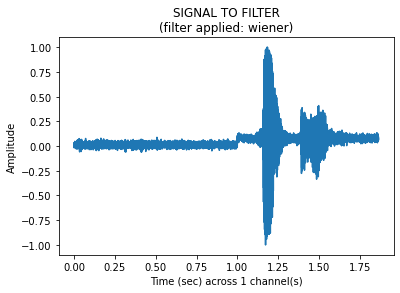

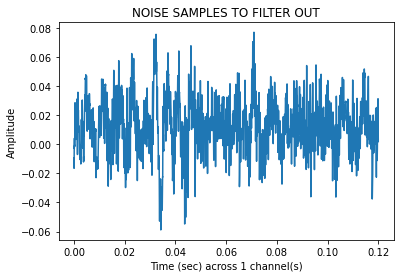

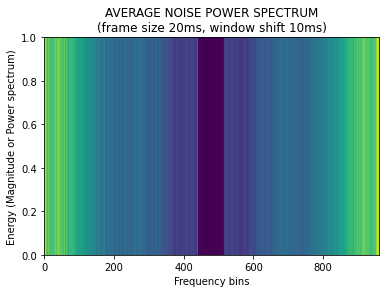

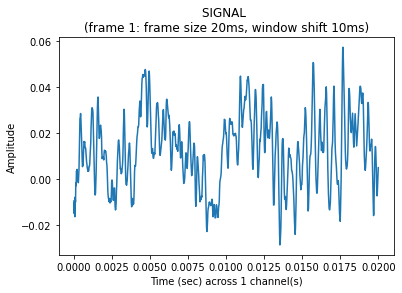

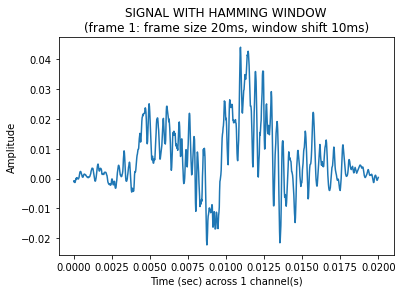

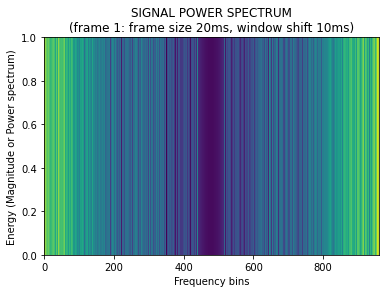

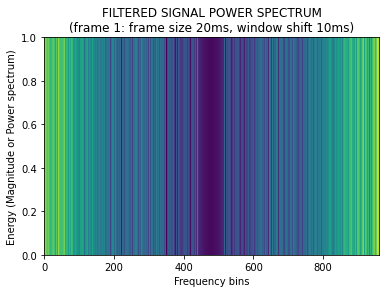

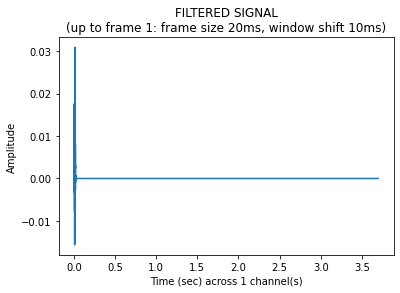

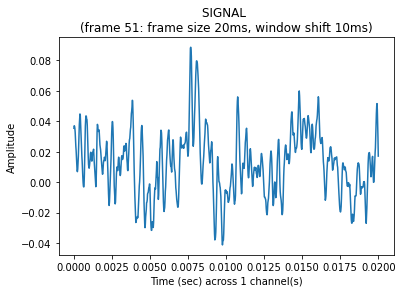

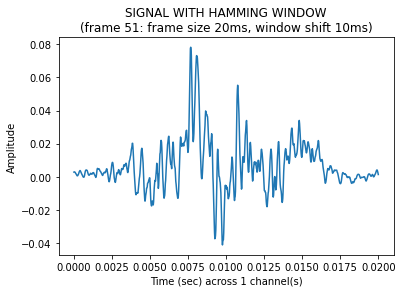

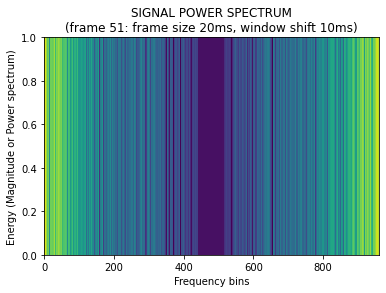

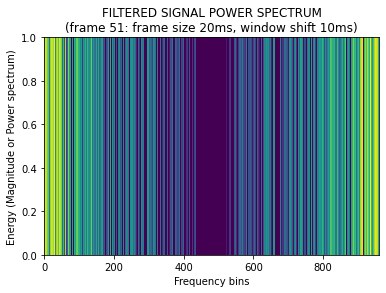

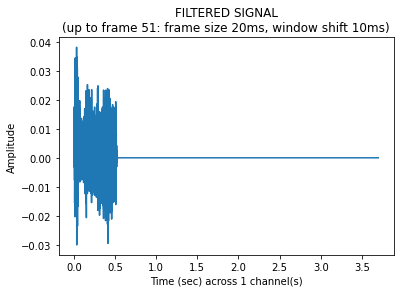

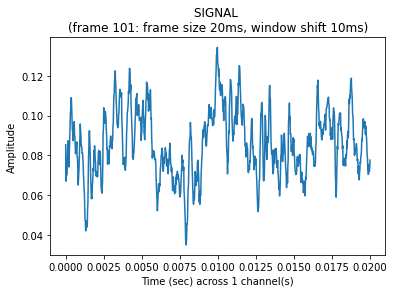

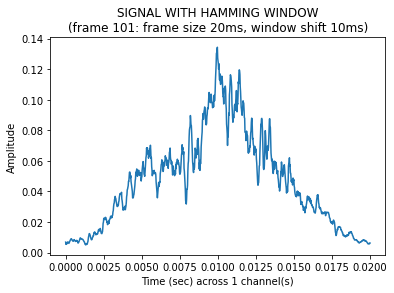

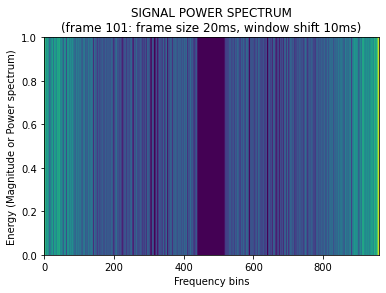

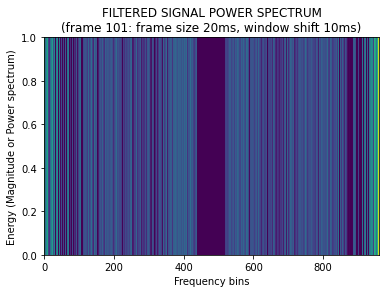

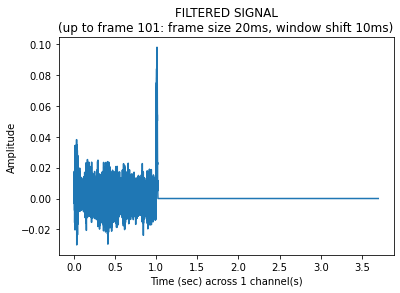

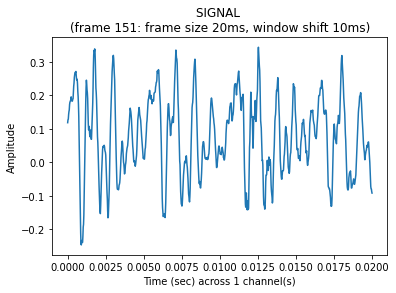

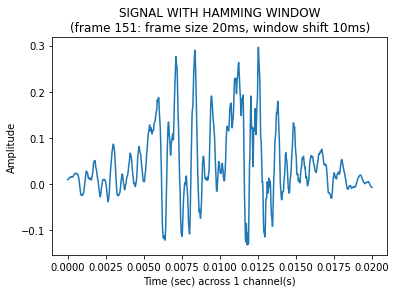

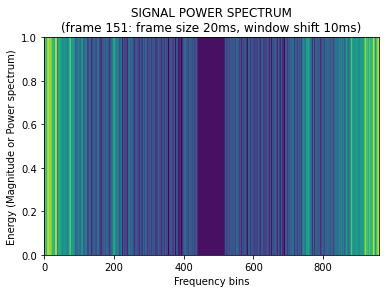

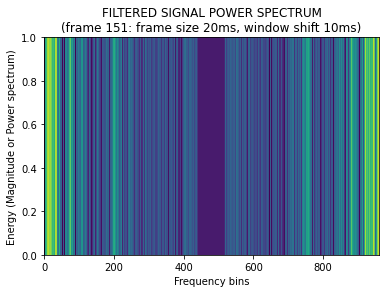

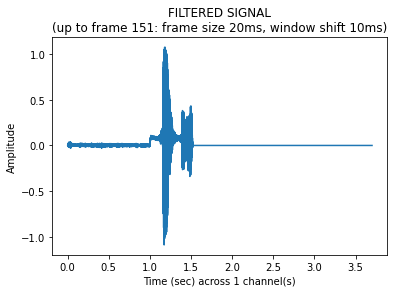

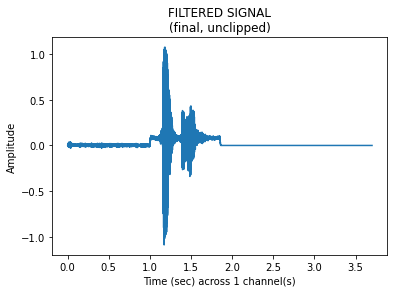

volume adjusted from 1.08 to 0.4
audiofile saved under: python_traffic_wiener


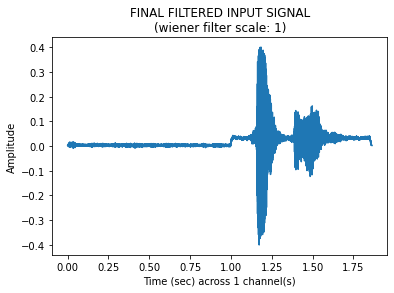

In [3]:
filter_type = 'wiener'
pyst.filtersignal(output_filename = 'python_traffic_{}'.format(filter_type),
                  audiofile = noisy_speech_file,
                  filter_type = filter_type,
                  visualize = True,
                  visualize_every_n_frames = 50,
                  apply_postfilter = False,
                  real_signal = False,
                  frame_duration_ms=20,
                  percent_overlap=0.5,
                  duration_noise_ms=120)
sr, samps_filtered = read('python_traffic_{}'.format(filter_type))
ipd.Audio(samps_filtered,rate=sr)

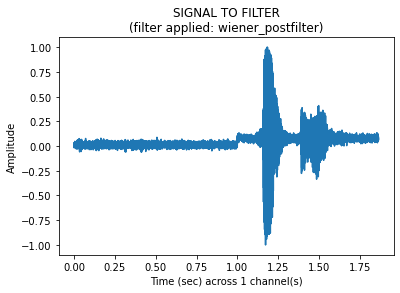

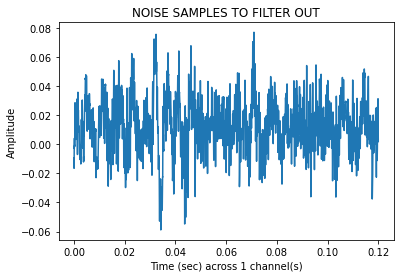

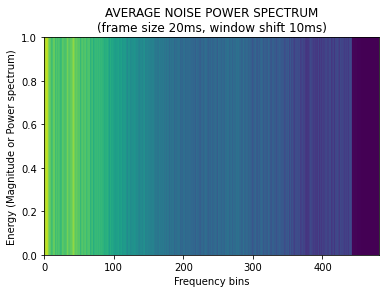

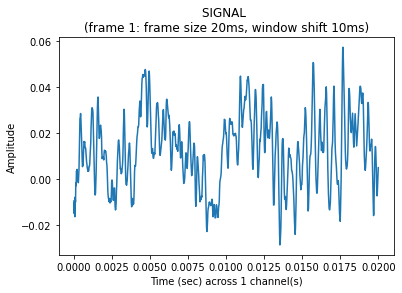

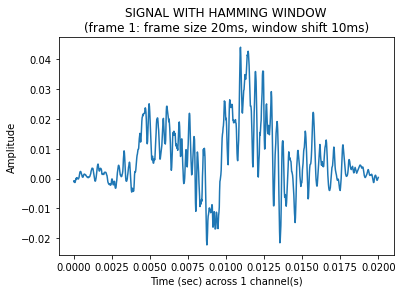

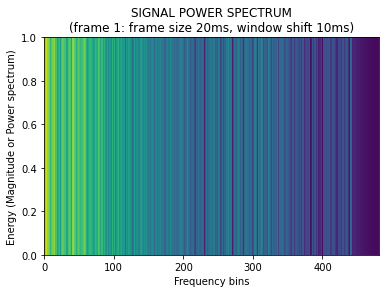

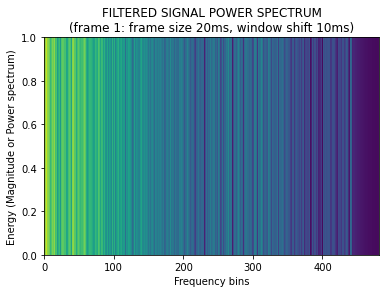

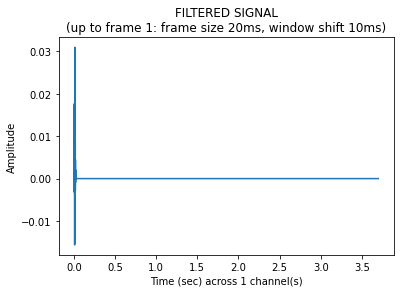

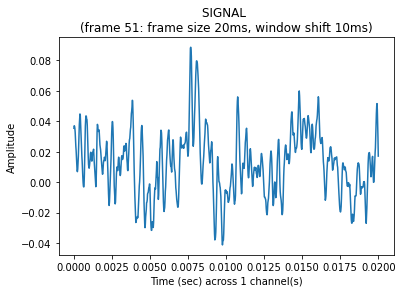

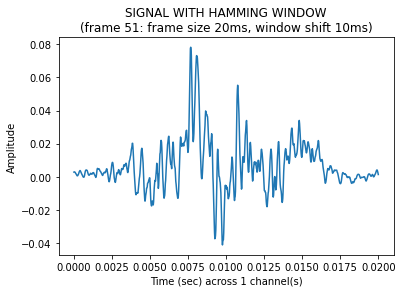

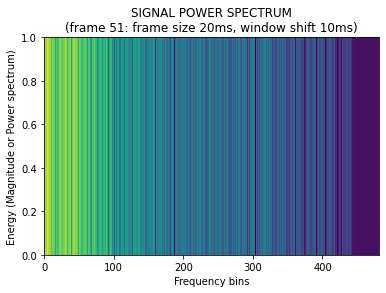

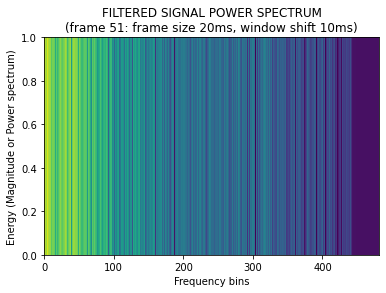

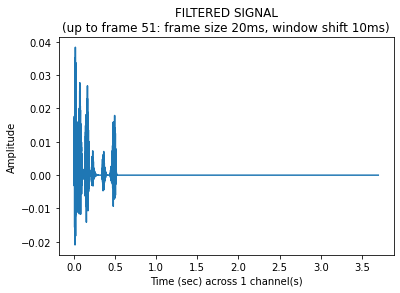

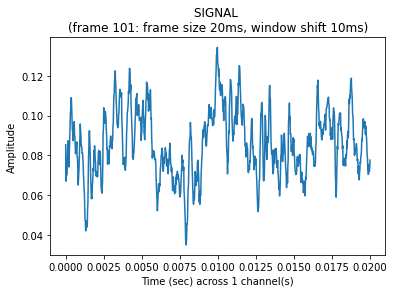

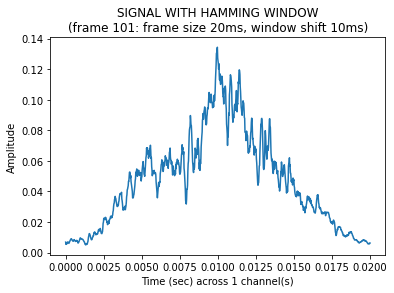

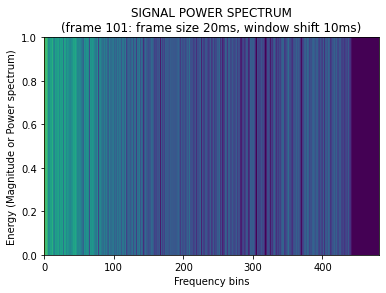

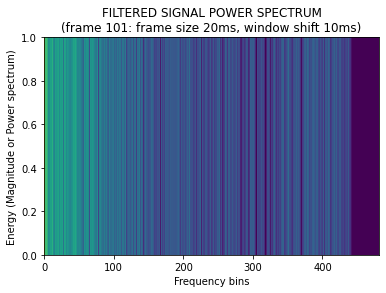

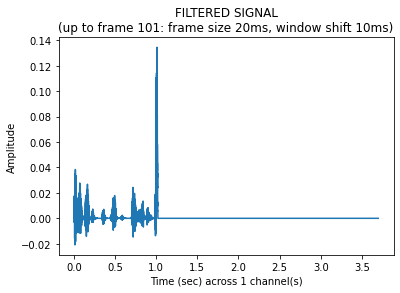

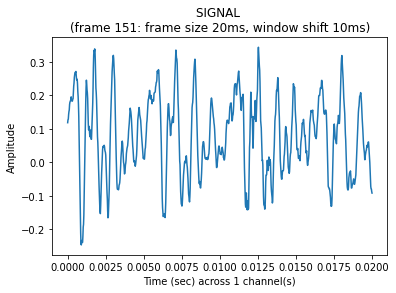

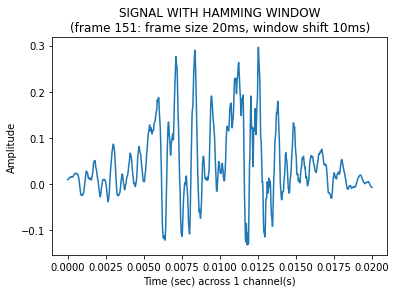

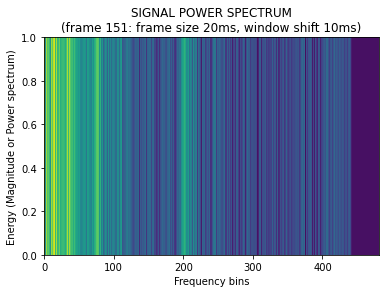

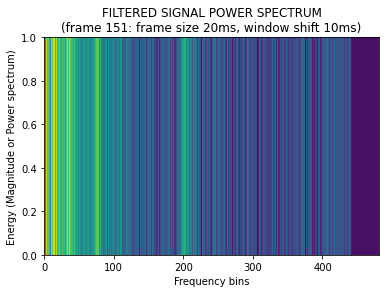

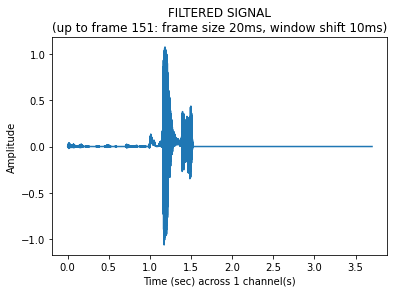

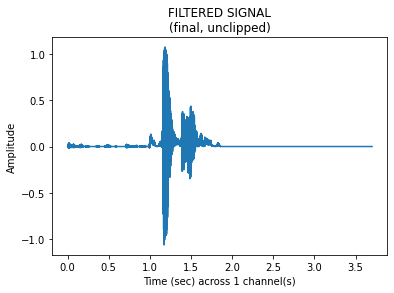

volume adjusted from 1.07 to 0.4
audiofile saved under: python_traffic_wiener_postfilter


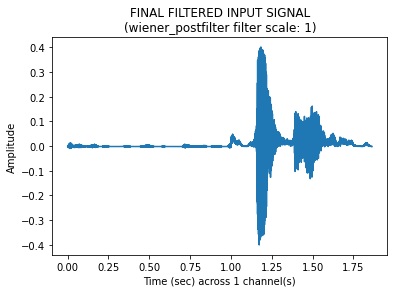

In [4]:
filter_type = 'wiener_postfilter'
pyst.filtersignal(output_filename = 'python_traffic_{}'.format(filter_type),
                  audiofile = noisy_speech_file,
                  filter_type = filter_type,
                  visualize = True,
                  visualize_every_n_frames = 50,
                  apply_postfilter = True,
                  real_signal = True,
                  frame_duration_ms=20,
                  percent_overlap=0.5,
                  duration_noise_ms=120)
sr, samps_filtered = read('python_traffic_{}'.format(filter_type))
ipd.Audio(samps_filtered,rate=sr)

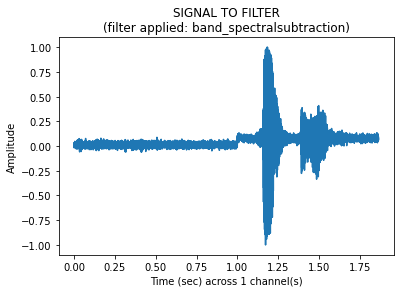

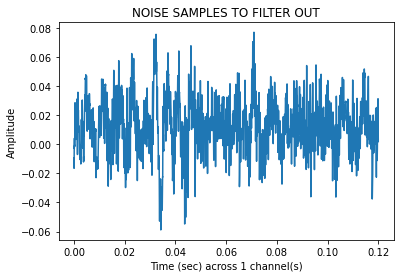

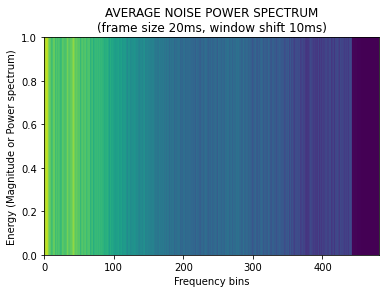

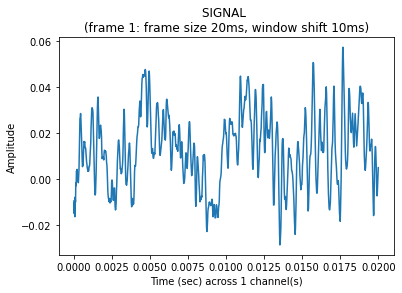

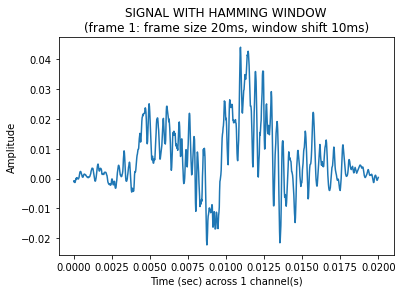

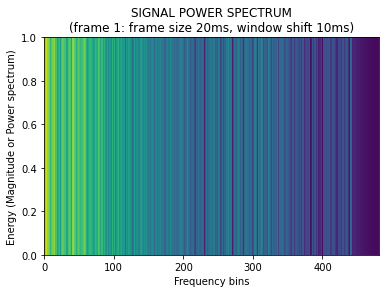

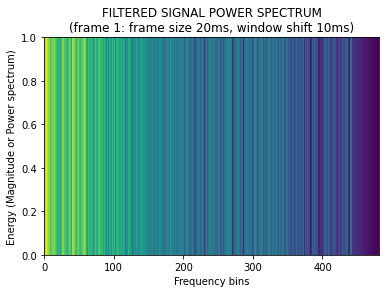

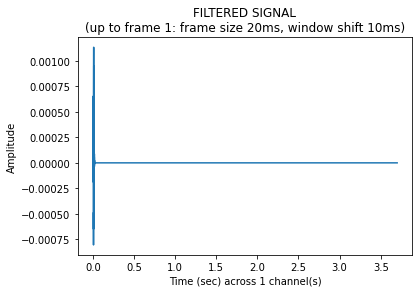

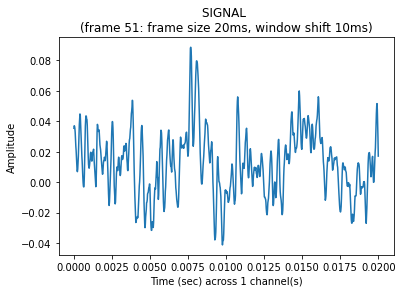

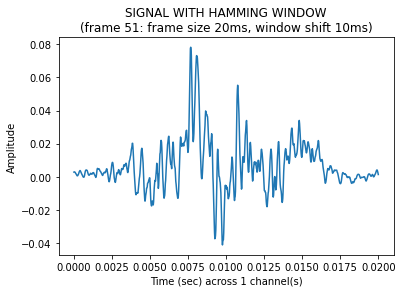

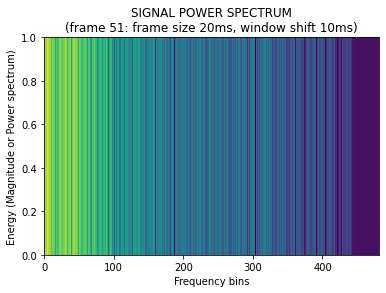

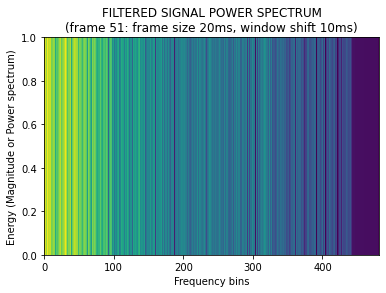

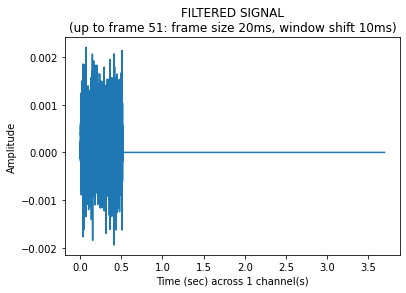

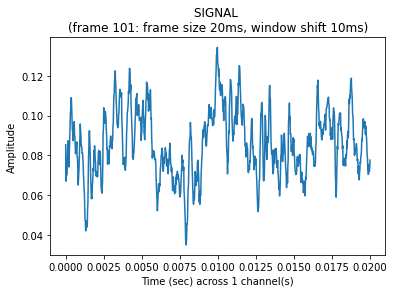

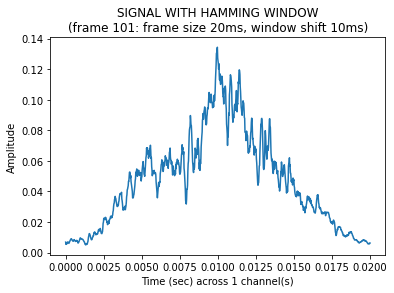

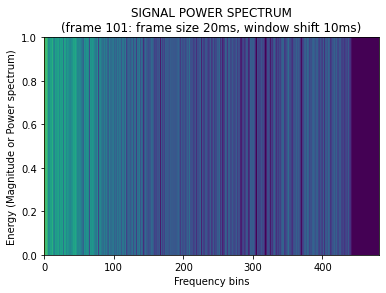

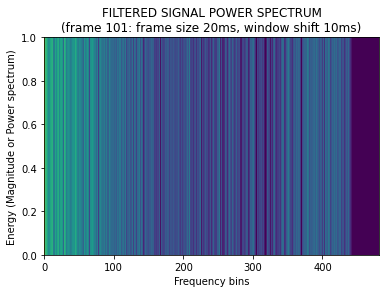

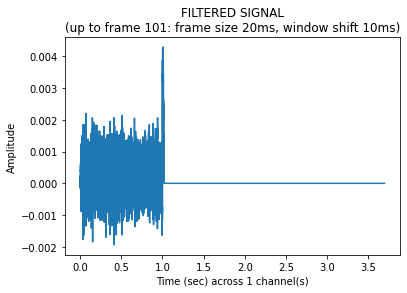

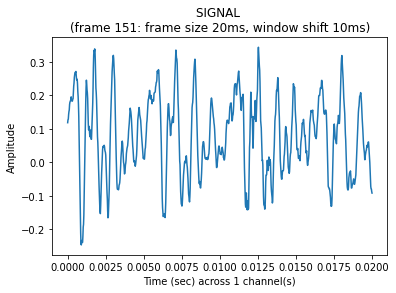

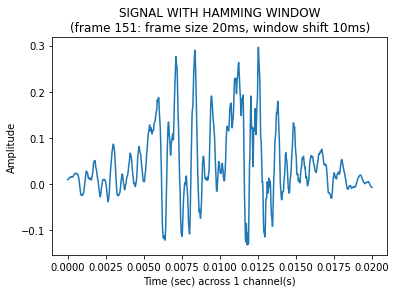

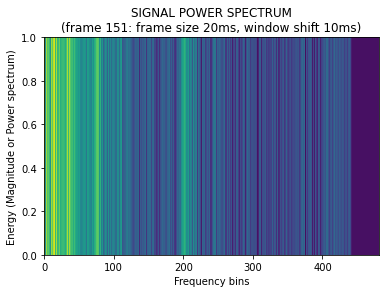

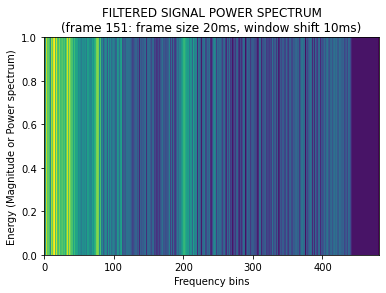

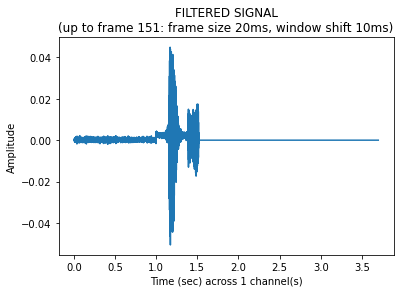

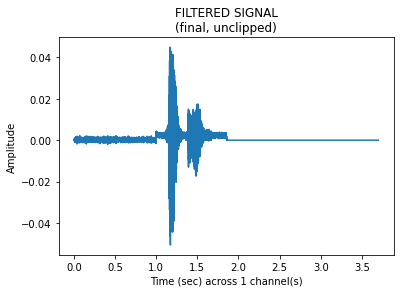

volume adjusted from 0.04 to 0.4
audiofile saved under: python_traffic_band_spectralsubtraction


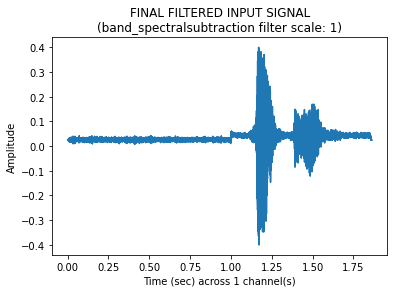

In [5]:
filter_type = 'band_spectralsubtraction'
pyst.filtersignal(output_filename = 'python_traffic_{}'.format(filter_type),
                  audiofile = noisy_speech_file,
                  filter_type = filter_type,
                  visualize = True,
                  visualize_every_n_frames = 50,
                  apply_postfilter = True,
                  real_signal = True,
                  phase_radians = True,
                  num_bands = 8,
                  frame_duration_ms=20,
                  percent_overlap=0.5,
                  duration_noise_ms=120,)
sr, samps_filtered = read('python_traffic_{}'.format(filter_type))
ipd.Audio(samps_filtered,rate=sr)